## Exercises from Lecture 3 from Stanford CS20 - Tensorflow for Deep Learning

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

### Upload the data file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving birth_life_2010.txt to birth_life_2010.txt


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "birth_life_2010.txt" with length 5513 bytes


### Load the data

In [0]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples


In [0]:
DATA_FILE = 'birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = read_birth_life_data(DATA_FILE)

In [0]:
tf.reset_default_graph()
LOG_DIR = 'tbtry'

## Simple Linear Regression

In [0]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

# Step 4: build model to predict Y
Y_predicted = w * X + b 

# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


start = time.time()
writer = tf.summary.FileWriter(LOG_DIR, tf.get_default_graph())
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	# Step 8: train the model for 100 epochs
	for i in range(100): 
		total_loss = 0
		for x, y in data:
			# Session execute optimizer and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_out, b_out = sess.run([w, b]) 

print('w is ', w_out, 'b is ', b_out)
print('Took: %f seconds' %(time.time() - start))

# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## Quadratic Regression (wX**2 + uX + b)

In [0]:
# Y_predicted = wX**2 + uX + b

# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight, bias and u, initialized to 0
w = tf.get_variable('w', initializer=tf.constant(0.0))
u = tf.get_variable('u', initializer=tf.constant(0.0))
b = tf.get_variable('b', initializer=tf.constant(0.0))

# Step 4: build model to predict Y
Y_predicted = w * X * X + u * X + b 

# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()
writer = tf.summary.FileWriter(LOG_DIR, tf.get_default_graph())
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	# Step 8: train the model for 100 epochs
	for i in range(500): 
		total_loss = 0
		for x, y in data:
			# Session execute optimizer and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_out, u_out, b_out = sess.run([w, u, b]) 

print('w is ', w_out, 'u is ', u_out, 'b is ', b_out)
print('Took: %f seconds' %(time.time() - start))

# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## Linear Regression with Huber loss instead of Mean Square loss

In [0]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

# Step 4: build model to predict Y
Y_predicted = w * X + b 

# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


start = time.time()
writer = tf.summary.FileWriter(LOG_DIR, tf.get_default_graph())
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	# Step 8: train the model for 100 epochs
	for i in range(100): 
		total_loss = 0
		for x, y in data:
			# Session execute optimizer and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_out, b_out = sess.run([w, b]) 

print('w is ', w_out, 'b is ', b_out)
print('Took: %f seconds' %(time.time() - start))

# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## Linear Regression with Datasets instead of placeholders

(tf.float32, tf.float32)
(TensorShape([]), TensorShape([]))
Epoch 0: 1661.8637834631543
Epoch 1: 956.3224148609137
Epoch 2: 844.6737023980994
Epoch 3: 750.7312486011339
Epoch 4: 667.6598341012079
Epoch 5: 594.1417715627896
Epoch 6: 529.07878103068
Epoch 7: 471.5004191489204
Epoch 8: 420.5458626462441
Epoch 9: 375.45530721966765
Epoch 10: 335.5543025185697
Epoch 11: 300.24629857978107
Epoch 12: 269.00376475843336
Epoch 13: 241.35957466852116
Epoch 14: 216.90039135300015
Epoch 15: 195.25972298129324
Epoch 16: 176.1137693605349
Epoch 17: 159.17551693441837
Epoch 18: 144.1907111125557
Epoch 19: 130.93503488078713
Epoch 20: 119.20935661137888
Epoch 21: 108.8379309807855
Epoch 22: 99.66466760624593
Epoch 23: 91.55177013029001
Epoch 24: 84.37664046781751
Epoch 25: 78.03217824997724
Epoch 26: 72.42182927812989
Epoch 27: 67.46136239485718
Epoch 28: 63.07566952367442
Epoch 29: 59.19874146522856
Epoch 30: 55.77168446383194
Epoch 31: 52.74269822355127
Epoch 32: 50.065632780875376
Epoch 33: 47.7000

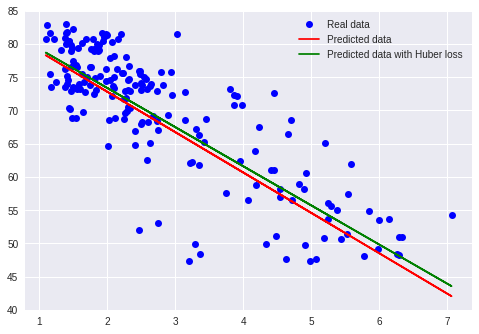

In [19]:
# Step 2a: create Datasets for X (birth rate) and Y (life expectancy)
dataset = tf.data.Dataset.from_tensor_slices((data[:, 0], data[:, 1]))

# Print out type and shape of entries in the dataset for sanity check
print(dataset.output_types)			# (tf.float32, tf.float32)
print(dataset.output_shapes)		# (TensorShape([]), TensorShape([]))

# Step 2b: create an Iterator for the Dataset
iter = dataset.make_initializable_iterator()
X, Y = iter.get_next()

# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

# Step 4: build model to predict Y
Y_predicted = w * X + b 

# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()
writer = tf.summary.FileWriter(LOG_DIR, tf.get_default_graph())
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iter.initializer) # initialize the iterator
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 
    print('w: %f, b: %f' %(w_out, b_out))

print('w is ', w_out, 'b is ', b_out)
print('Took: %f seconds' %(time.time() - start))

# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.plot(data[:,0], data[:,0] * (-5.883589) + 85.124306, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()

## Linear Regression with different optimiser